In [1]:
data = readdlm(ENV["HOME"]*"/Downloads/4vector.txt")

19475×4 Array{Float64,2}:
  1.37593     0.0733583    52.428     1.0
  1.66718    -0.173329     57.6687   -1.0
 -4.66217     0.4692       27.0238   -1.0
  0.622873   -0.103362     20.7749    0.0
  0.850787   -0.00661432   30.7145    0.0
  0.85591    -0.277296     16.3433    1.0
  0.488469   -0.0711089     8.61192  -1.0
 -2.02922    -0.0521621   155.944    -1.0
  0.297221   -0.0137995     5.56121   0.0
  0.381758    0.031699      5.00631   0.0
 -0.760004   -0.811267     18.2711    1.0
  2.20558     2.68386     133.237    -1.0
 -0.193996   -0.361155      6.81264  -1.0
  ⋮                                      
  0.162215    0.191283      7.06221   0.0
 -0.131254   -0.0787702     1.10055   0.0
  3.24003     0.476558     26.6511    1.0
 -6.93007    -1.35201     131.786    -1.0
  2.76707     0.561494     22.596    -1.0
  0.388577    0.00966608    2.95183   0.0
  0.163472    0.0571229     1.27278   0.0
  3.15683     0.514247     51.1433    1.0
 -7.01713    -1.14744      69.029    -1.0
  0.9095

In [3]:
using DataFrames

In [2]:
energy(p,m) = sqrt(p'p+m^2)
invm(P) = P[4]^2-P[1]^2-P[2]^2-P[3]^2

invm (generic function with 1 method)

In [4]:
const mπ = 0.13957;

In [5]:
Nev = Int64(size(data,1)/5)
# data storage
tree = DataFrame(
    [Array{Float64,1} for i in 1:5],
    [:P, :M1, :M2, :G1, :G2],
    Nev);
# fill with events
for i in 1:Nev
    block = data[(5(i-1)+1):5i,:]
    tree[i,:P],tree[i,:M1],tree[i,:M2] = [[block[j,1:3]...,energy(block[j,1:3],mπ)] for j in 1:3];
    tree[i,:G1],tree[i,:G2] = [[block[j,1:3]...,energy(block[j,1:3],0)] for j in 4:5];
end

In [6]:
using Plots

### Invariant mass of $\gamma\gamma$

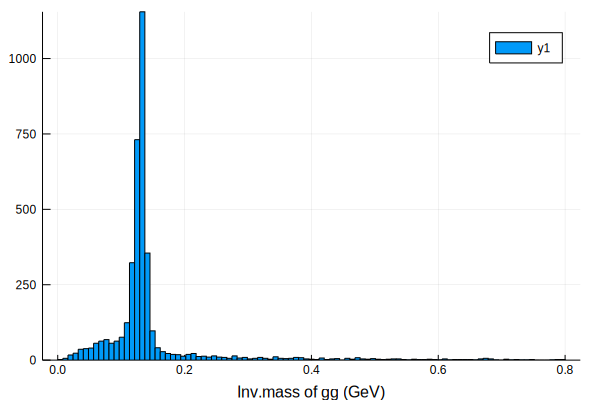

In [7]:
histogram(sqrt.(invm.(tree[:,:G1]+tree[:,:G2])), bins=linspace(0,0.8,100), xlab="Inv.mass of gg (GeV)")

### Three pions system

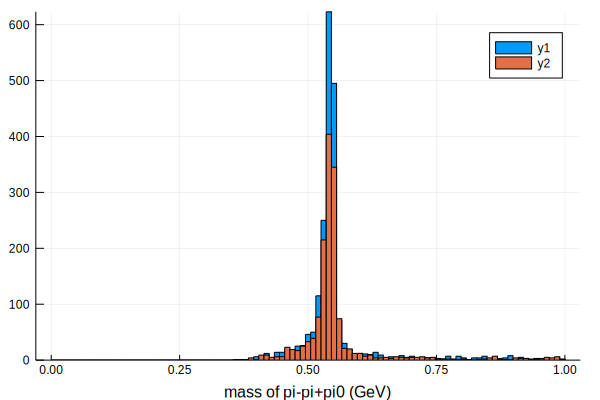

In [8]:
plot(xlab="mass of pi-pi+pi0 (GeV)")
histogram!(sqrt.(invm.(tree[:,:M1]+tree[:,:P]+tree[:,:G1]+tree[:,:G2])),bins=linspace(0,1,100))
histogram!(sqrt.(invm.(tree[:,:M2]+tree[:,:P]+tree[:,:G1]+tree[:,:G2])),bins=linspace(0,1,100))

### Sum of energies

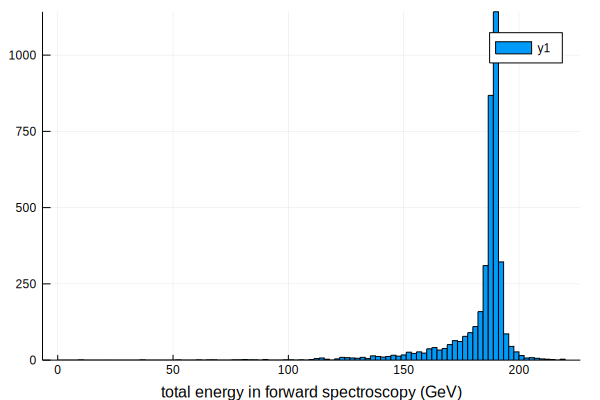

In [9]:
histogram(
    [tree[i,:G1][4]+tree[i,:G2][4]+tree[i,:P][4]+tree[i,:M2][4]+tree[i,:M1][4] for i in 1:size(tree,1)],
    bins=linspace(0,220,100), xlab="total energy in forward spectroscopy (GeV)")

### Invariant mass of the whole system

In [10]:
λ(x,y,z) = x^2+y^2+z^2-2x*y-2y*z-2z*x

λ (generic function with 1 method)

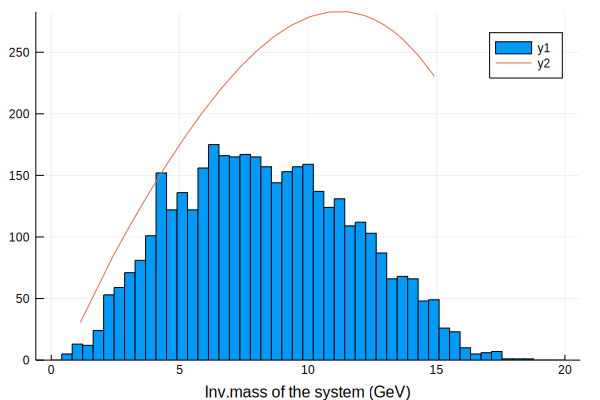

In [11]:
histogram(
    sqrt.(invm.(tree[:,:G1]+tree[:,:G2]+tree[:,:P]+tree[:,:M1]+tree[:,:M2])),
    bins=linspace(0,20,50), xlab="Inv.mass of the system (GeV)")
let s0 = 190*2*1+1
    plot!(mx->0.1*sqrt(λ(s0,1,mx^2)*λ(mx^2,0.58^2,0.139^2))/mx,1,15)
end